C:\Users\win10\AppData\Local\Temp\ipykernel_11688\863278268.py:16: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


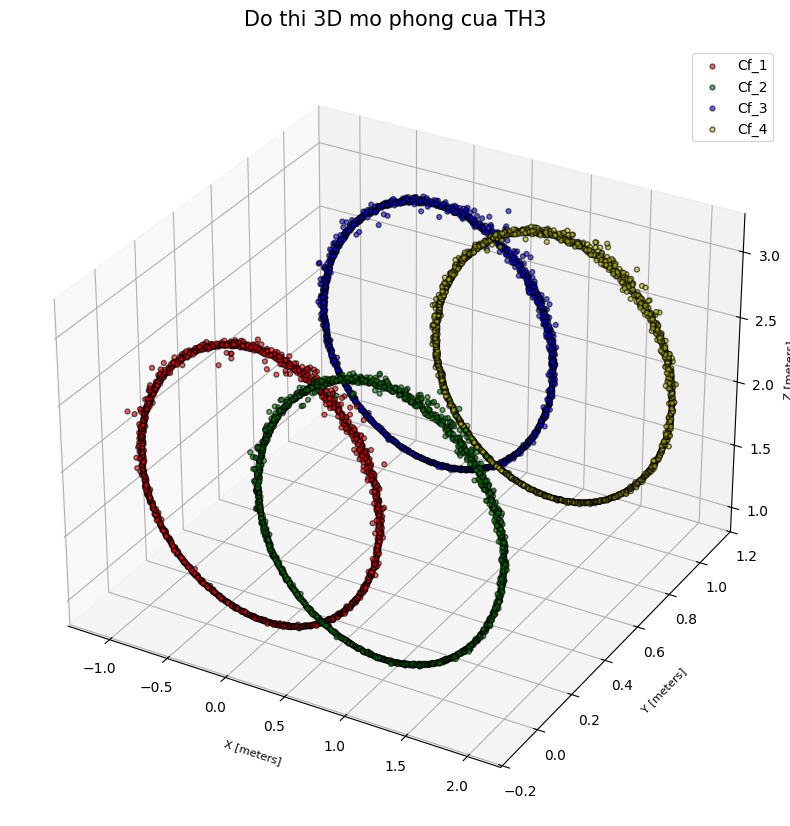

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Đường dẫn đến các tệp CSV
file_paths = [
    'H://file csv//th31.csv',
    'H://file csv//th32.csv',
    'H://file csv//th33.csv',
    'H://file csv//th34.csv'
]

# Đọc dữ liệu từ các tệp CSV và làm sạch dữ liệu
data_frames = []
for file in file_paths:
    df = pd.read_csv(file)
    df = df.apply(pd.to_numeric, errors='coerce')  # Chuyển đổi các giá trị thành số, các giá trị không phải số sẽ là NaN
    df = df.dropna()  # Loại bỏ các hàng có giá trị NaN
    data_frames.append(df)

# Tạo đồ thị 3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Vẽ từng tập dữ liệu
colors = ['r', 'g', 'b', 'y']  # Màu sắc cho các tập dữ liệu khác nhau
for i, df in enumerate(data_frames):
    df = df.iloc[:50000]  # Chỉ vẽ đến dòng thứ 50000
    df = df.iloc[::30]  # Lấy mẫu 1/50 số điểm dữ liệu để giảm độ dày
    x = df.iloc[:, 0]
    y = df.iloc[:, 1]
    z = df.iloc[:, 2]
    ax.scatter(x, y, z, label=f'Cf_{i+1}', color=colors[i % len(colors)], s=12, edgecolor='k', alpha=0.6)

# Đặt nhãn cho các trục
ax.set_xlabel('X [meters]', labelpad=8, fontsize=8)
ax.set_ylabel('Y [meters]', labelpad=8, fontsize=8)
ax.set_zlabel('Z [meters]', labelpad=2, fontsize=8)

# Đặt tên cho đồ thị
ax.set_title('Do thi 3D mo phong cua TH3', fontsize=15, pad=15)

# Hiển thị đồ thị
ax.legend(fontsize=10)
plt.show()


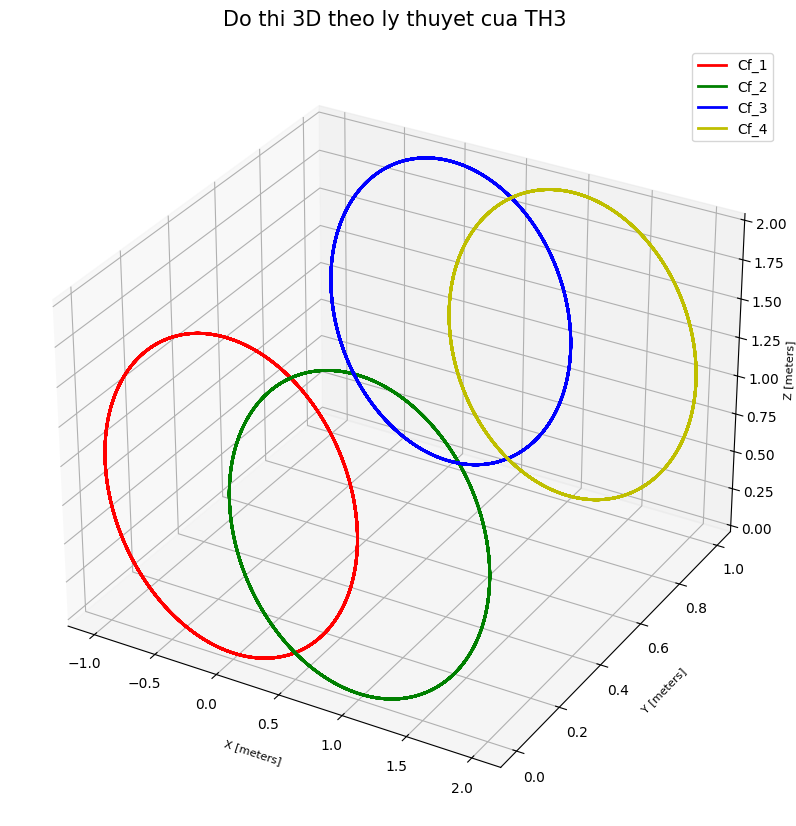

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Thiết lập quỹ đạo bay horizontal_circle
def horizontal_circle_trajectory(t, trajectory_start_position):
    a = 1.0
    omega = 0.75*np.tanh(0.1*t)
    pxr = trajectory_start_position[0] + a*np.sin(-omega*t + np.pi)
    pyr = trajectory_start_position[1]
    pzr = trajectory_start_position[2] + a*np.cos(-omega*t + np.pi) + a
    return pxr, pyr, pzr

# Tạo dữ liệu quỹ đạo cho 4 vị trí bắt đầu khác nhau
start_positions = [
    [0, 0, 0],
    [1, 0, 0],
    [0, 1, 0],
    [1, 1, 0]
]

# Tạo đồ thị 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Vẽ từng quỹ đạo horizontal_circle
colors = ['r', 'g', 'b', 'y']
t = np.linspace(0, 100, 5000)  # Thay đổi phạm vi và số lượng điểm nếu cần

for i, start_pos in enumerate(start_positions):
    x_data, y_data, z_data = horizontal_circle_trajectory(t, start_pos)
    ax.plot(x_data, y_data, z_data, label=f'Cf_{i+1}', color=colors[i], linewidth=2)

# Đặt nhãn cho các trục
ax.set_xlabel('X [meters]', labelpad=8, fontsize=8)
ax.set_ylabel('Y [meters]', labelpad=8, fontsize=8)
ax.set_zlabel('Z [meters]', labelpad=2, fontsize=8)

# Đặt tên cho đồ thị
ax.set_title('Do thi 3D theo ly thuyet cua TH3', fontsize=15, pad=15)

# Hiển thị đồ thị
ax.legend(fontsize=10)
plt.show()

